In [1]:
import pandas as pd

df = pd.read_csv("employee_performance.csv")

df.head()  

,EmployeeID,Name,Gender,Department,Salary,JoinDate,PerformanceRating
0,E001,Dr. Lisa Rogers,Male,Marketing,108988.18,13-11-2021,4
1,E002,Nichole Peterson,Female,Finance,31002.41,02-07-2015,5
2,E003,Paul Blair,Female,Sales,73663.33,04-05-2023,1
3,E004,Michelle Thomas,Other,Marketing,84044.55,18-11-2019,1
4,E005,Jessica Berg,Female,Marketing,92527.68,30-11-2019,3


In [2]:
df['JoinDate'] = pd.to_datetime(df['JoinDate'], format='%d-%m-%Y', errors='coerce')

df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df['PerformanceRating'] = pd.to_numeric(df['PerformanceRating'], errors='coerce')

df = df.dropna()  


In [3]:
df['Tenure'] = 2025 - df['JoinDate'].dt.year

def categorize_salary(salary):
    if salary < 50000:
        return "Low"
    elif salary <= 90000:
        return "Medium"
    else:
        return "High"

df['SalaryCategory'] = df['Salary'].apply(categorize_salary)


In [4]:
avg_salary_by_dept = df.groupby('Department')['Salary'].mean().reset_index()

gender_count_by_dept = df.groupby(['Department', 'Gender']).size().reset_index(name='Count')

avg_rating_by_dept = df.groupby('Department')['PerformanceRating'].mean().reset_index()

low_performers = df[df['PerformanceRating'] <= 2]


In [5]:

with pd.ExcelWriter("output.xlsx") as writer:
    df.to_excel(writer, sheet_name='CleanedData', index=False)
    avg_salary_by_dept.to_excel(writer, sheet_name='AvgSalaryDept', index=False)
    gender_count_by_dept.to_excel(writer, sheet_name='GenderCountDept', index=False)
    avg_rating_by_dept.to_excel(writer, sheet_name='AvgRatingDept', index=False)
    low_performers.to_excel(writer, sheet_name='LowPerformers', index=False)


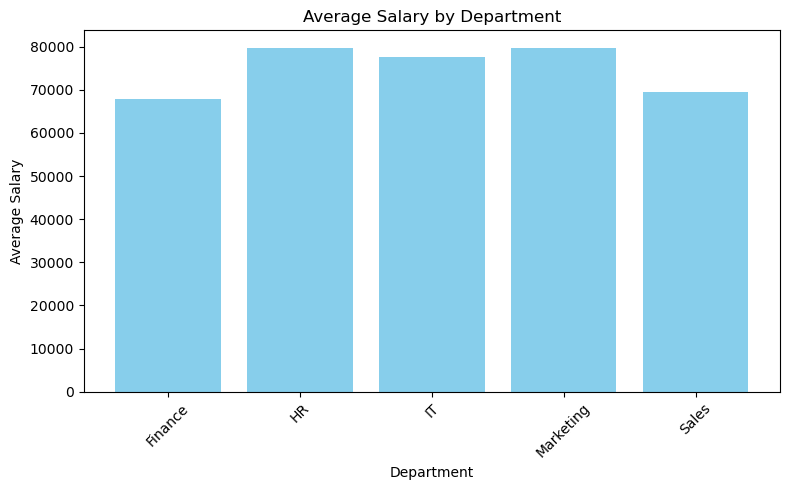

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your data is already loaded in df
# Step 1: Grouping
avg_salary_by_dept = df.groupby('Department')['Salary'].mean().reset_index()

# Step 2: Bar Chart
departments = avg_salary_by_dept['Department']
salaries = avg_salary_by_dept['Salary']

plt.figure(figsize=(8, 5))
plt.bar(departments, salaries, color='skyblue')
plt.title("Average Salary by Department")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("bar_avg_salary_by_dept.png")
plt.show()


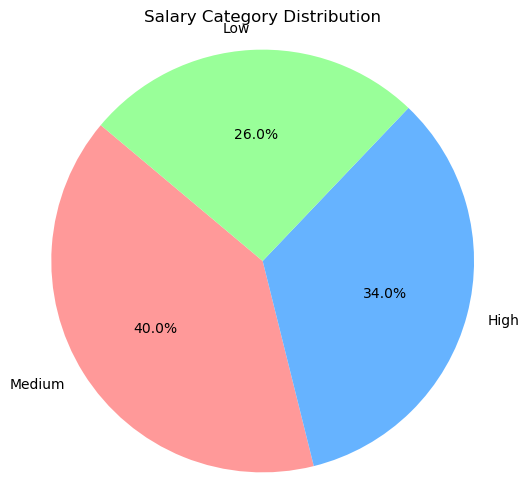

In [16]:
# Count each salary category
category_counts = df['SalaryCategory'].value_counts()

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Salary Category Distribution")
plt.axis('equal')  # Equal aspect ratio to make it a perfect circle

# Save and show the chart
plt.savefig("pie_salary_category.png")
plt.show()
